In [1]:
import numpy as np
#exported data from dot website , 468329 row and  105  columns

#https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
dataset= pd.read_csv('On_Time_On_Time_Performance_2017_4.csv')


/home/atena/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
dataset.shape

(468329, 105)

In [3]:
dataset.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Unnamed: 109'],
      dtype='object', length=110)

In [4]:
dataset.shape

(468329, 110)

In [5]:
dataset.isnull().sum()
dataset=dataset.drop(['Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum'], 1)

In [6]:
dataset.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       ...
       'Div3WheelsOff', 'Div3TailNum', 'Div4Airport', 'Div4AirportID',
       'Div4AirportSeqID', 'Div4WheelsOn', 'Div4TotalGTime',
       'Div4LongestGTime', 'Div4WheelsOff', 'Unnamed: 109'],
      dtype='object', length=101)

In [7]:
dataset.head(2)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Unnamed: 109
0,2017,2,4,8,6,2017-04-08,EV,20366,EV,N398CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,2,4,10,1,2017-04-10,EV,20366,EV,N755EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset['FlightDate'].value_counts()

2017-04-21    16413
2017-04-03    16408
2017-04-07    16381
2017-04-28    16371
2017-04-13    16344
2017-04-20    16344
2017-04-24    16344
2017-04-17    16343
2017-04-06    16339
2017-04-14    16330
2017-04-10    16315
2017-04-27    16309
2017-04-05    16030
2017-04-19    16028
2017-04-12    16026
2017-04-18    15941
2017-04-26    15939
2017-04-11    15920
2017-04-04    15912
2017-04-02    15796
2017-04-25    15770
2017-04-23    15660
2017-04-09    15646
2017-04-30    15526
2017-04-16    15129
2017-04-01    13637
2017-04-08    13463
2017-04-22    13458
2017-04-15    13162
2017-04-29    13045
Name: FlightDate, dtype: int64

In [9]:
dataset['first_week'] =  (dataset['FlightDate'] > '2017-03-30') & (dataset['FlightDate'] <= '2017-04-08')


In [10]:
dataset['second_week'] =  (dataset['FlightDate'] >='2017-04-09') & (dataset['FlightDate'] <= '2017-04-15')

In [11]:
dataset['third_week'] =  (dataset['FlightDate'] >='2017-04-16') & (dataset['FlightDate'] <= '2017-04-22')

In [12]:
dataset['fourth_week'] =  (dataset['FlightDate'] >= '2017-04-23') & (dataset['FlightDate'] <= '2017-04-30')

In [13]:
#dataset_dum=pd.get_dummies(dataset, columns=['first_week','second_week','third_week','fourth_week'], drop_first=True)
#dataset_dum.head(3)

In [14]:
dataset[['first_week','second_week','third_week','fourth_week','FlightDate']]

,first_week,second_week,third_week,fourth_week,FlightDate
0,True,False,False,False,2017-04-08
1,False,True,False,False,2017-04-10
2,False,True,False,False,2017-04-11
3,False,True,False,False,2017-04-12
4,False,True,False,False,2017-04-13
5,False,True,False,False,2017-04-14
6,False,True,False,False,2017-04-15
7,False,False,True,False,2017-04-17
8,False,False,True,False,2017-04-18
9,False,False,True,False,2017-04-19


In [15]:
# dataset['saturday_firstweek']= ((dataset['first_week'].astype(int) )==1) & ((dataset_dum['DayOfWeek']==6))
# dataset['sunday_firstweek']= ((dataset['first_week'].astype(int) )==1) & ((dataset_dum['DayOfWeek']==7))
# dataset['monday_firstweek']= ((dataset['first_week'].astype(int) )==1) & ((dataset_dum['DayOfWeek']==1))
# dataset['tuesday_firstweek']= ((dataset['first_week'].astype(int) )==1) & ((dataset_dum['DayOfWeek']==2))
# dataset['wednesday_firstweek']= ((dataset['first_week'].astype(int) )==1) & ((dataset_dum['DayOfWeek']==3))
# dataset['thursday_firstweek']= ((dataset['first_week'].astype(int) )==1) & ((dataset_dum['DayOfWeek']==4))
# dataset['friday_firstweek']= ((dataset['first_week'].astype(int) )==1) & ((dataset_dum['DayOfWeek']==5))


# #df[df['A'].isin([3, 6])]

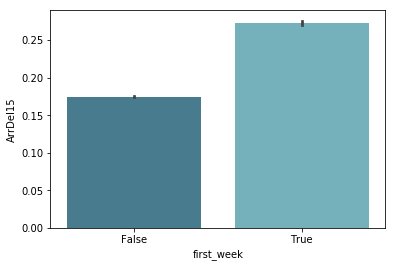

In [36]:

sns.barplot(x='first_week', y='ArrDel15', data=dataset, palette='GnBu_d')


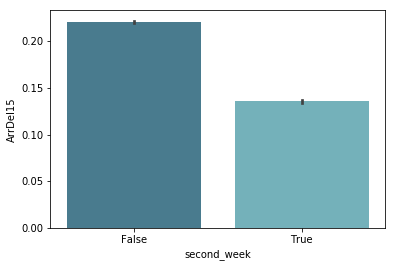

In [37]:
sns.barplot(x='second_week', y='ArrDel15', data=dataset, palette='GnBu_d')


In [18]:
dataset[['first_week','second_week','third_week','fourth_week','FlightDate']]

,first_week,second_week,third_week,fourth_week,FlightDate
0,True,False,False,False,2017-04-08
1,False,True,False,False,2017-04-10
2,False,True,False,False,2017-04-11
3,False,True,False,False,2017-04-12
4,False,True,False,False,2017-04-13
5,False,True,False,False,2017-04-14
6,False,True,False,False,2017-04-15
7,False,False,True,False,2017-04-17
8,False,False,True,False,2017-04-18
9,False,False,True,False,2017-04-19


In [19]:
dataset['first_week'].value_counts()    #total flights first week =123965

False    344363
True     123966
Name: first_week, dtype: int64

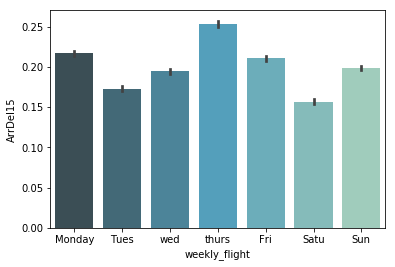

In [39]:
dataset['weekly_flight'] = pd.cut(dataset['DayOfWeek'], [-1, 1, 2, 3, 4, 5, 6,7],
                            labels = ['Monday','Tues','wed','thurs','Fri','Satu','Sun'])
sns.barplot(x="weekly_flight", y='ArrDel15', data=dataset, palette='GnBu_d')

In [40]:
dataset.drop(['TailNum','UniqueCarrier','Quarter','Carrier','AirlineID','OriginAirportID','OriginAirportSeqID',
              'OriginCityMarketID','FlightNum','OriginStateFips','OriginCityName','OriginWac',
              'DestCityName','DestAirportID','DestAirportSeqID','AirTime',   'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime', 'LongestAddGTime',
       'DivAirportLandings', 'DivReachedDest', 'DivActualElapsedTime',
       'DivArrDelay', 'DivDistance', 'Div1Airport', 'Div1AirportID',
       'Div1AirportSeqID', 'Div1WheelsOn', 'Div1TotalGTime',
       'Div1LongestGTime', 'Div1WheelsOff', 'Div1TailNum', 'Div2Airport',
       'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn', 'Div2TotalGTime',
       'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum', 'Div3Airport',
       'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn', 'Div3TotalGTime',
       'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum', 'Div4Airport',
              'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn', 'Div4TotalGTime'] ,axis=1, inplace=True)

In [42]:

final_delay_data=dataset[(dataset['Origin']=='LAX')  &  (dataset['ArrDel15']==1)  & (dataset['first_week'].astype(int)==1)]
final_data=dataset[(dataset['Origin']=='LAX') & (dataset['first_week'].astype(int)==1)]


In [ ]:
sum(final_data['ArrDel15']!=1)

In [ ]:
sum(final_data['ArrDel15']==1)

In [ ]:
final_delay_data[final_delay_data['Cancelled']!=0]

In [ ]:
final_data.shape

In [ ]:
final_delay_data.shape

In [ ]:
final_data['Origin'].value_counts() ##total flight in first week LAX    8678

In [ ]:
final_delay_data['Origin'].value_counts() #total with arrival delay 15 LAX    1882

In [ ]:
final_data['ArrDel15'].describe()                 #mean        0.263461
                                      #std         0.440559

/home/atena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


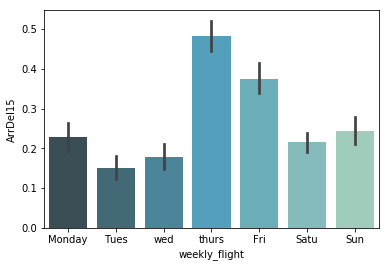

In [43]:
final_data['weekly_flight'] = pd.cut(final_data['DayOfWeek'], [-1, 1, 2, 3, 4, 5, 6,7],
                            labels = ['Monday','Tues','wed','thurs','Fri','Satu','Sun'])

sns.barplot(x="weekly_flight", y='ArrDel15', data=final_data, palette='GnBu_d')

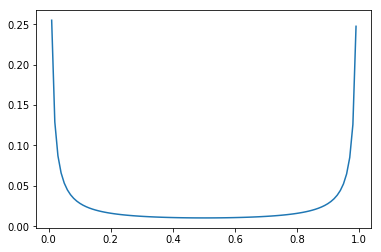

In [34]:
#plot beta 
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
a = 2
b = 2
x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 0.0035, 0.01)
#y2 = beta.pdf(x, 3.25, 3.25)
#y3 = beta.pdf(x, 3, 3)
plt.plot(x, y1, "-")#, x, y2, "r--", x, y3, "g--")
plt.show()

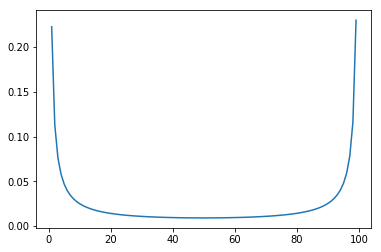

In [29]:
# #so we can take N the total number of flights in a week 
# #FYI for now i tried k=300 and N = 4592

import scipy


import numpy as np
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline
k=300
n = 4592
a=0.01
b=0.003
r=np.arange(0.,1.01,.01)
prior=scipy.stats.beta.pdf(r,a,b)
plt.plot(prior)
plt.show()

[  0.00000000e+000   3.07604849e-135   3.79690501e-064   1.31487564e-030
   1.46268918e-012   4.24943036e-003   3.83646121e+001   4.68154166e+001
   7.30771780e-002   6.19342062e-007   7.61828097e-014   2.73262305e-022
   4.76815406e-032   5.95003570e-043   7.14147605e-055   1.03951826e-067
   2.20542147e-081   7.90259737e-096   5.38765807e-111   7.69913506e-127
   2.49579385e-143   1.95757848e-160   3.91569156e-178   2.08443179e-196
   3.05574110e-215   1.26746112e-234   1.51874231e-254   5.33885494e-275
   5.56446468e-296   1.73037303e-317   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000   0.00000000e+

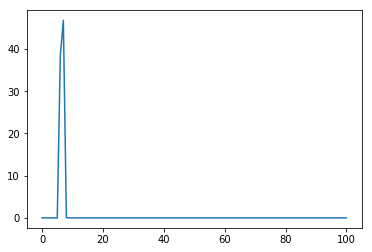

In [35]:

alpha = a+k; beta = b+n-k
posterior=scipy.stats.beta.pdf(r,alpha,beta)
# ax.plot(r, scipy.stats.beta.pdf(r, a, b), ‘b-’, lw=2,  label=‘beta pdf’)
# ax.set_xlabel(“$\\theta$“)
# ax.set_ylabel(“posterior probability density”)
# plt.show()
print(posterior)
plt.plot(posterior)
plt.show()

In [39]:
new_k=400
new_n=4086

new_posterior=scipy.stats.beta.pdf(r,a+new_k, b+new_n-new_k)
new_prior=posterior
#new_likelihood=np.random.binomial(new_k,new_prior,4086)
#new_h=new_prior*new_likelihood

In [48]:
print(a) 
print(b)
#print(new_posterior)
#print(sum(new_posterior))

0.01
0.003


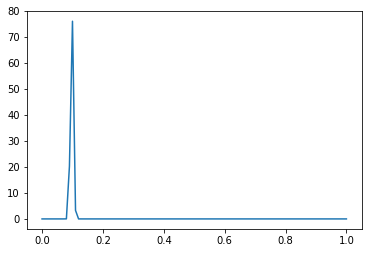

In [46]:
#normalize new posterior 
plt.plot(r, new_posterior)
plt.show()

In [23]:
# secondweek_data=dataset[(dataset['Origin']=='LAX')  & (dataset['second_week'].astype(int)==1)]
# secondweek_data.shape

(4086, 105)

In [22]:
# secondweek_data=dataset[(dataset['Origin']=='LAX')  & (dataset['second_week'].astype(int)==1) & (dataset['ArrDel15']==1)]
# secondweek_data['ArrDel15'].value_counts()

1.0    693
Name: ArrDel15, dtype: int64

In [60]:
#secondweek_data['ArrDel15'].describe()  

count    4066.000000
mean        0.170438
std         0.376063
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ArrDel15, dtype: float64

In [ ]:
so probablity that we have 400 delayed flight in second week of April is between 10% and 20%, 
which comparing the data from second week proved that its true as its is 14%.